In [7]:
import pandas as pdimport os

import matplotlib.pyplot as plt
import seaborn as s
ns

In [10]:
df = pd.read_csv('../data/dataset_CSsources_Mod.csv')
df

,spp,sp,Grid,Platform,Records
0,O_cuniculus,O. cuniculus,UG18,GBIF,5
1,O_cuniculus,O. cuniculus,UG18,NoVal,34
2,O_cuniculus,O. cuniculus,UG18,seqRec,129
3,O_cuniculus,O. cuniculus,UG18,dailyRec,48
4,L_granatensis,L. granatensis,UG18,GBIF,0
...,...,...,...,...,...
699,S_vulgaris,S. vulgaris,UH40,dailyRec,0
700,E_quercinus,E. quercinus,UH40,GBIF,0
701,E_quercinus,E. quercinus,UH40,NoVal,0
702,E_quercinus,E. quercinus,UH40,seqRec,0


In [4]:
df.columns

Index(['spp', 'sp', 'Grid', 'Platform', 'Records'], dtype='object')

In [14]:
# Change the levels directly for Platform Variable
df['Platform'] = df['Platform'].replace({
    'GBIF': 'Global Biodiversity',
    'NoVal': 'No Validation',
    'seqRec': 'Sequences Record',
    'dailyRec': 'Daily Record'
})

GBIF: indicate that the speceis records came form Global Biodiversity Information Facility
NoVal: indicate that the species records have no been validated by experts
seqRec: indicate that the species records came from Sequence (cluster of images) Records
dailyRec: indicate that the species records came from Daily Records
Records: quantify the number of records by paltform type and species.
Grid: is the code to identify 10x10km grid cells where the records were collected.

In [15]:
# Change the variable name 'Platform' to 'Data Source'
df.rename(columns={'Platform': 'Data.Source'}, inplace=True)
df.rename(columns={'sp': 'Species.Name'}, inplace=True)
df.head()

,spp,Species.Name,Grid,Data.Source,Records
0,O_cuniculus,O. cuniculus,UG18,Global Biodiversity,5
1,O_cuniculus,O. cuniculus,UG18,No Validation,34
2,O_cuniculus,O. cuniculus,UG18,Sequences Record,129
3,O_cuniculus,O. cuniculus,UG18,Daily Record,48
4,L_granatensis,L. granatensis,UG18,Global Biodiversity,0


# Distribution Analysis of Numerical Features


In [16]:
# First DataFrame: excluding Daily Record
df_sequences = df[df['Data.Source'] != 'Daily Record']

# Second DataFrame: excluding Sequences Record
df_daily = df[df['Data.Source'] != 'Sequences Record']

print("DataFrame  with sequences:")
print(df_sequences.head())

print("\nDataFrame with daily records:")
print(df_daily.head())

DataFrame  with sequences:
             spp    Species.Name  Grid          Data.Source  Records
0    O_cuniculus    O. cuniculus  UG18  Global Biodiversity        5
1    O_cuniculus    O. cuniculus  UG18        No Validation       34
2    O_cuniculus    O. cuniculus  UG18     Sequences Record      129
4  L_granatensis  L. granatensis  UG18  Global Biodiversity        0
5  L_granatensis  L. granatensis  UG18        No Validation        1

DataFrame with daily records:
             spp    Species.Name  Grid          Data.Source  Records
0    O_cuniculus    O. cuniculus  UG18  Global Biodiversity        5
1    O_cuniculus    O. cuniculus  UG18        No Validation       34
3    O_cuniculus    O. cuniculus  UG18         Daily Record       48
4  L_granatensis  L. granatensis  UG18  Global Biodiversity        0
5  L_granatensis  L. granatensis  UG18        No Validation        1


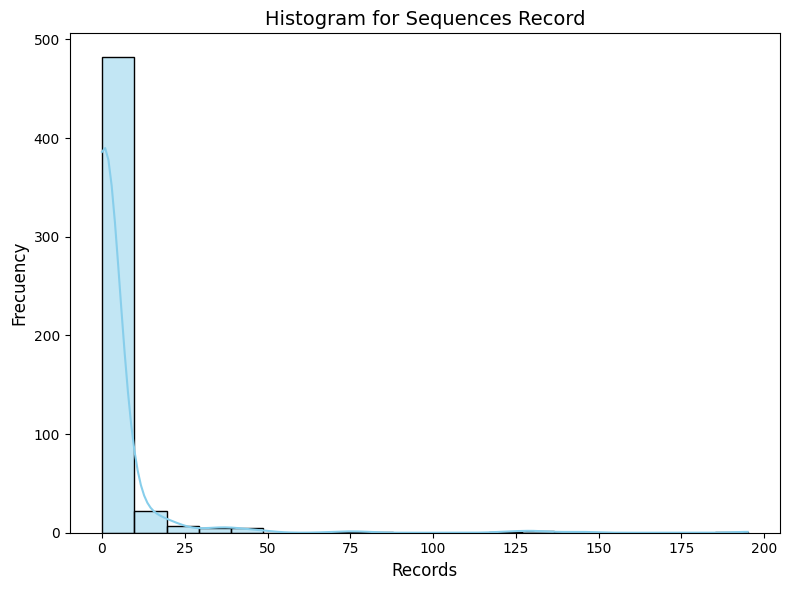

In [17]:


# Histograma para df_sequences (asegúrate de que df_sequences ya está definido)
plt.figure(figsize=(8, 6))
sns.histplot(df_sequences['Records'], bins=20, kde=True, color='skyblue')

# Personalización
plt.title('Histogram for Sequences Record', fontsize=14)
plt.xlabel('Sequences Records', fontsize=12)
plt.ylabel('Frecuency', fontsize=12)

plt.tight_layout()
plt.show()

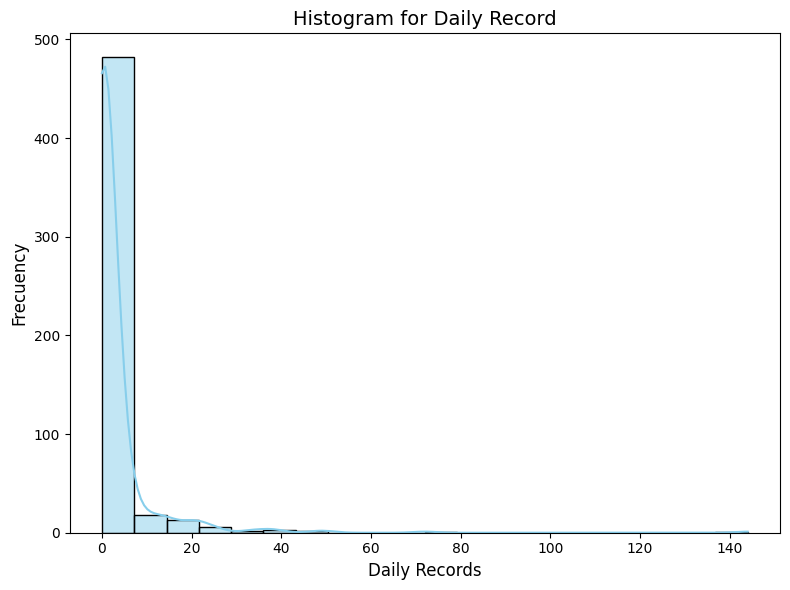

In [18]:
# Histograma para df_sequences (asegúrate de que df_sequences ya está definido)
plt.figure(figsize=(8, 6))
sns.histplot(df_daily['Records'], bins=20, kde=True, color='skyblue')

# Personalización
plt.title('Histogram for Daily Record', fontsize=14)
plt.xlabel('Daily Records', fontsize=12)
plt.ylabel('Frecuency', fontsize=12)

plt.tight_layout()
plt.show()

In [20]:
# Filter by each font type
df_daily = df[df['Data.Source'] == 'Daily Record']
df_sequences = df[df['Data.Source'] == 'Sequences Record']

# Group and sum the 'Records' column (or whichever column you want to sum).
daily_sum = df_daily.groupby('Species.Name')['Records'].sum().reset_index()
daily_sum.rename(columns={'Records': 'Daily_Sum'}, inplace=True)

sequences_sum = df_sequences.groupby('Species.Name')['Records'].sum().reset_index()
sequences_sum.rename(columns={'Records': 'Sequences_Sum'}, inplace=True)

# Combine both results by species
df_nspecies_grid = pd.merge(daily_sum, sequences_sum, on='Species.Name', how='outer').fillna(0)

print(df_nspecies_grid)

      Species.Name  Daily_Sum  Sequences_Sum
0       C. elaphus          2              3
1    C. pynernaica          0              0
2     E. europaeus          0              0
3     E. quercinus          5             10
4       G. genetta         55             65
5    H. icheneumon         30             35
6   L. granatensis         38             42
7         L. lutra          1              1
8         M. foina         26             36
9         M. meles         16             19
10      M. nivalis          1              1
11     M. putorius          0              0
12    O. cuniculus        199            700
13       S. scrofa         66            114
14     S. vulgaris          0              0
15       V. vulpes        150            224


Correlación between Daily_Sum y Sequences_Sum:
               Daily_Sum  Sequences_Sum
Daily_Sum       1.000000       0.921163
Sequences_Sum   0.921163       1.000000


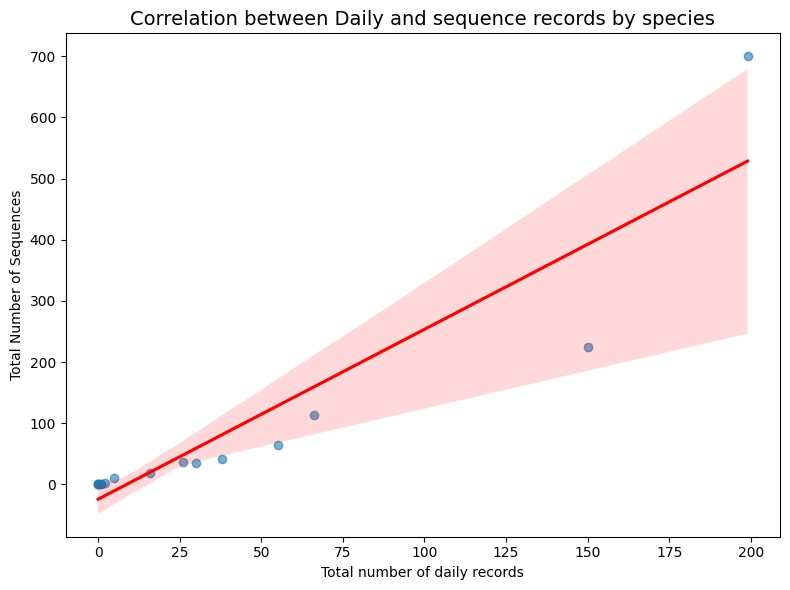

In [23]:

# Calcular la correlación (Pearson por defecto)
correlation = df_nspecies_grid [['Daily_Sum', 'Sequences_Sum']].corr(method='pearson')
print("Correlación between Daily_Sum y Sequences_Sum:")
print(correlation)

# Visualización con un scatter plot y línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x='Daily_Sum', y='Sequences_Sum', data=df_nspecies_grid , scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Correlation between daily and sequence records by species', fontsize=14)
plt.xlabel('Total number of daily records')
plt.ylabel('Total number of sequences')
plt.tight_layout()plt.tight_layout()
l.Dsvfg"m/rends_byOrder.png", dpi=300)
plt.show()
plt.show()


## Explanation of Distribution and Correlation Visualizations

### 1. Data Sources and Aggregation

The dataset combines species occurrence coming from two anlytical different approaches: (a) **Daily Record** for each camera trap device if a specie was recorded or nor by each specie and day.  and (b) **Sequences Record** are clusters of images sequences of related images). After cleaning, the platform labels were harmonized and the data were aggregated per species: we summed counts of records independently for Daily and Sequence sources to obtain `Daily_Sum` and `Sequences_Sum` for each species. These aggregated values form the basis of the exploratory plots.


### 2. Distribution Histograms

Two histograms display the frequency distribution of record counts (`Records`) for each source type: one for Sequences Record and one for Daily Record. Key points typically inspected in these plots include:

- **Skewness**: Citizen science data often show right-skew (many species with few records, few species with many records).

- **Zero / Low Inflation**: A concentration near zero suggests many species are rarely reported in a given mode.

- **Tail Behavior**: A long tail may indicate a handful of very commonly recorded species.

- **Comparative Spread**: Differences in spread between the two histograms can hint at contrasting engagement or detectability patterns between daily single-image submissions and multi-image sequence uploads.



If the Sequences histogram appears more concentrated at low counts while the Daily histogram has a broader tail, that could mean daily observations capture common species more redundantly, whereas sequences might be used selectively. Conversely, similar shapes would suggest both modes sample species with comparable intensity.


### 3. Correlation Scatter Plot

The scatter plot relates `Daily_Sum` (x-axis) to `Sequences_Sum` (y-axis) at the species level, with a fitted regression line (red) and semi-transparent points to mitigate overplotting. This visualization helps assess whether species recorded frequently in one mode are also frequent in the other.


### 4. Pearson Correlation Interpretation

The printed correlation matrix above includes the Pearson coefficient between `Daily_Sum` and `Sequences_Sum`. Interpretation guidelines:

- **Positive and High (e.g., > 0.6)**: Species popular in daily submissions tend also to generate many sequence records (shared drivers like abundance, conspicuousness, or observer interest).

- **Near Zero (≈ 0)**: Little linear association; each mode might capture distinct ecological or user behavior niches.

- **Moderate (0.3–0.5)**: Partial overlap—some joint popularity, yet mode-specific factors remain.

- **Negative** (unlikely here): Would imply substitution (species recorded heavily in one mode are underrepresented in the other).



Because counts can be highly skewed, the Pearson correlation may be influenced by a few high-count species. A log or square-root transform (after handling zeros) could be explored to stabilize variance and reassess the relationship.


### 5. Potential Data Characteristics and Caveats

- **Sampling Bias**: Volunteer interest and ease of photographing certain taxa may inflate counts independently of true abundance.

- **Detection Probability**: Some species are easier to record via sequences (behavioral patterns) versus daily single sightings.

- **Data Quality**: The distinction between validated and non-validated records (mentioned earlier) could affect reliability; merging sources without considering validation status may introduce noise.

- **Outliers**: Species with extremely high counts should be inspected to ensure they are not artifacts (e.g., mislabeling or duplicated submissions).


### 6. Suggestions for Further Analysis

- Apply log-transforms to both sums and recompute Pearson and Spearman correlations.

- Examine residuals of the regression line for heteroscedasticity (variance increasing with mean).

- Consider species-level metadata (e.g., taxonomy, habitat) to explain differential mode popularity.

- Partition analyses by grid cell to see if spatial patterns alter correlation strength.


### 7. Summary

The histograms contextualize the overall reporting intensity and its distribution, while the scatter plot and correlation quantify the alignment between daily and sequence reporting behaviors across species. Together they provide an initial quantitative lens on how different citizen science submission modes complement or overlap in documenting biodiversity.